<a href="https://colab.research.google.com/github/noorfatima640/water-quality-ml/blob/main/LightGBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

file_path = "/content/water-quality-FINAL-cleaned.csv"
df = pd.read_csv(file_path)

# one-hot encode season
df = pd.get_dummies(df, columns=["Season"], drop_first=True)

df.head()

,pH,DO,Conductivity,Temperature,Total_N,Orthophosphate,Year,Month,Season_numerical,Season_Spring,Season_Summer,Season_Winter
0,0.903448,-0.121627,0.004939,0.926817,-0.911018,0.029471,2015,8,3,False,True,False
1,0.783984,-0.858708,-0.052245,0.753946,-0.363770,0.046118,2015,8,3,False,True,False
2,1.103978,0.020234,-0.106052,1.203410,-0.363770,0.025256,2015,8,3,False,True,False
3,0.254928,-0.518440,-0.135834,0.995965,-0.034853,0.056022,2015,8,3,False,True,False
4,0.476790,0.215664,-0.035970,0.719372,-0.596279,0.039585,2015,8,3,False,True,False


In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

wqi_cols = ["pH", "DO", "Conductivity",
            "Temperature", "Total_N", "Orthophosphate"]

scaled_vals = MinMaxScaler().fit_transform(df[wqi_cols])
scaled_df = pd.DataFrame(scaled_vals, columns=wqi_cols)

positive = ["DO", "pH"]
negative = ["Temperature", "Conductivity", "Total_N", "Orthophosphate"]

wqi = np.zeros(len(df))

for col in positive:
    wqi += scaled_df[col]

for col in negative:
    wqi += (1 - scaled_df[col])

df["WQI"] = (wqi / len(wqi_cols)) * 100

In [3]:
from sklearn.model_selection import train_test_split

y_temp = df["Temperature"]
X_temp = df.drop(columns=["Temperature"])

X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42
)

In [4]:
y_wqi = df["WQI"]
X_wqi = df.drop(columns=["WQI"])

X_train_wqi, X_test_wqi, y_train_wqi, y_test_wqi = train_test_split(
    X_wqi, y_wqi, test_size=0.2, random_state=42
)

In [5]:
!pip install lightgbm


In [6]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model_lgb_temp = LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)

model_lgb_temp.fit(X_train_temp, y_train_temp)

y_pred_lgb_temp = model_lgb_temp.predict(X_test_temp)

rmse_lgb_temp = np.sqrt(mean_squared_error(y_test_temp, y_pred_lgb_temp))
r2_lgb_temp = r2_score(y_test_temp, y_pred_lgb_temp)

print("LightGBM Temperature RMSE:", rmse_lgb_temp)
print("LightGBM Temperature R² :", r2_lgb_temp)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1591
[LightGBM] [Info] Number of data points in the train set: 111184, number of used features: 12
[LightGBM] [Info] Start training from score 0.007702
LightGBM Temperature RMSE: 0.09436729921884356
LightGBM Temperature R² : 0.9829505872231555


In [7]:
model_lgb_wqi = LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    random_state=42
)

model_lgb_wqi.fit(X_train_wqi, y_train_wqi)

y_pred_lgb_wqi = model_lgb_wqi.predict(X_test_wqi)

rmse_lgb_wqi = np.sqrt(mean_squared_error(y_test_wqi, y_pred_lgb_wqi))
r2_lgb_wqi = r2_score(y_test_wqi, y_pred_lgb_wqi)

print("LightGBM WQI RMSE:", rmse_lgb_wqi)
print("LightGBM WQI R² :", r2_lgb_wqi)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1591
[LightGBM] [Info] Number of data points in the train set: 111184, number of used features: 12
[LightGBM] [Info] Start training from score 70.924189
LightGBM WQI RMSE: 0.26617587930871206
LightGBM WQI R² : 0.9963035340440115


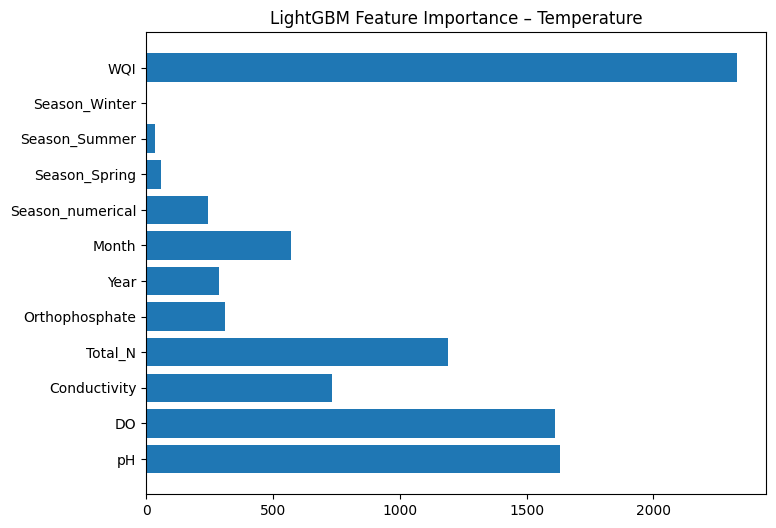

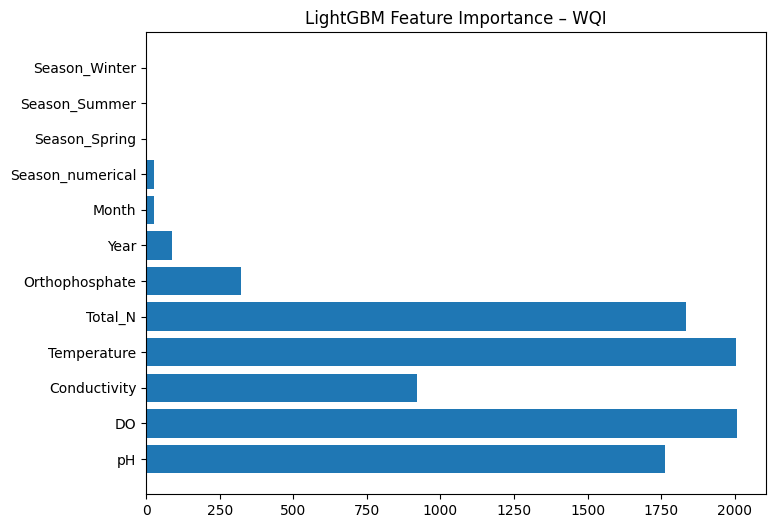

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(X_temp.columns, model_lgb_temp.feature_importances_)
plt.title("LightGBM Feature Importance – Temperature")
plt.show()

plt.figure(figsize=(8,6))
plt.barh(X_wqi.columns, model_lgb_wqi.feature_importances_)
plt.title("LightGBM Feature Importance – WQI")
plt.show()